In [1]:
import glob
import keras as k  #machine learning library
from keras.models import  Sequential, load_model  #model- Sequential
from keras.layers import Dense   #neural network dense layer(Each neuron recieves input from all the neurons in the previous layer)
import numpy as np  #num py pythton library use for numerical works
import pandas as pd  #pandas library use data manipulation and analysis
from sklearn.model_selection import train_test_split   #machine learining library
from sklearn.preprocessing import LabelEncoder,MinMaxScaler  #for lableEncoder use for converting strig in to number
import matplotlib.pyplot as plt  #use for plot our data
import os
import flask
import pickle

Using TensorFlow backend.


In [2]:
pwd

'C:\\Users\\Kushan\\IdeaProjects\\ML test\\venv'

In [3]:
df=pd.read_csv(r'C:\Users\Kushan\Documents\kidney_disease_improve.csv')
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
0,48,80,1.020,1,0,1,0,0,0,121,...,44,7800,5.2,1,1.0,0,1,0,0,1
1,7,50,1.020,4,0,0,0,0,0,175,...,38,6000,3.9,0,0.0,0,1,0,0,1
2,62,80,1.010,2,3,1,0,0,0,423,...,31,7500,3.9,0,1.0,0,0,0,1,1
3,48,70,1.005,4,0,1,1,1,0,117,...,32,6700,3.9,1,0.0,0,0,1,1,1
4,51,80,1.010,2,0,1,0,0,0,106,...,35,7300,4.6,0,0.0,0,1,0,0,1


In [4]:
#get shape of data
df.shape


(400, 25)

In [5]:
#create list of columns for informations
columns_to_retain=['al','hemo','pcc','rbcc','age','bp','bu','sod','pot','appet','dm','bgr','classification']  #select columns
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)  # filter selected columns
df = df.dropna(axis=0) # drop missing values or N/A data row

In [6]:
for column in df.columns:
  if df[column].dtype ==np.number:
    continue
  df[column]=LabelEncoder().fit_transform(df[column])

In [7]:
df.head()

,age,bp,al,pcc,bgr,bu,sod,pot,hemo,rbcc,dm,appet,classification
0,40,3,1,0,48,36.0,134.0,4.9,15.4,5.2,1.0,1,1
1,5,0,4,0,84,18.0,134.0,4.9,11.3,3.9,0.0,1,1
2,54,3,2,0,141,53.0,134.0,4.9,9.6,3.9,1.0,0,1
3,40,2,4,1,44,56.0,111.0,2.5,11.2,3.9,0.0,0,1
4,43,3,2,0,33,26.0,134.0,4.9,11.6,4.6,0.0,1,1


In [8]:
#difining X(feature set) and Y(result set)
X=df.drop(['classification'],axis=1)
Y=df['classification']

In [9]:
#Feature scalling using mon-max, after scalling all features lie between 1 and 0
x_scaler=MinMaxScaler()
x_scaler.fit(X)
column_name=X.columns
X[column_name]=x_scaler.transform(X)

In [10]:
# dvide train set and test sets( shuffle for better train set)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True);

In [11]:
#build model(using sequential method)  1 input layer(13 neurons) / 1 hiddn layer(256 neurons) / 1 out put layer(onr neuron)
model=Sequential()
model.add(Dense(256, activation='relu',kernel_initializer=k.initializers.random_normal(seed=13),input_dim=len(X.columns)))
model.add(Dense(1,activation='hard_sigmoid'))

In [12]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [13]:
#train data epochs=200
history=model.fit(X_train,Y_train, epochs=500, batch_size=X_train.shape[0])

Epoch 1/500
319/319 [==============================] - 0s 807us/step - loss: 0.6861 - accuracy: 0.4514
Epoch 2/500
319/319 [==============================] - 0s 3us/step - loss: 0.6752 - accuracy: 0.6301
Epoch 3/500
319/319 [==============================] - 0s 6us/step - loss: 0.6650 - accuracy: 0.8339
Epoch 4/500
319/319 [==============================] - 0s 3us/step - loss: 0.6552 - accuracy: 0.9310
Epoch 5/500
319/319 [==============================] - 0s 6us/step - loss: 0.6458 - accuracy: 0.9812
Epoch 6/500
319/319 [==============================] - 0s 3us/step - loss: 0.6368 - accuracy: 0.9467
Epoch 7/500
319/319 [==============================] - 0s 3us/step - loss: 0.6282 - accuracy: 0.8307
Epoch 8/500
319/319 [==============================] - 0s 6us/step - loss: 0.6198 - accuracy: 0.7524
Epoch 9/500
319/319 [==============================] - 0s 6us/step - loss: 0.6116 - accuracy: 0.6959
Epoch 10/500
319/319 [==============================] - 0s 6us/step - loss: 0.6036 - accu

Epoch 82/500
319/319 [==============================] - 0s 6us/step - loss: 0.1712 - accuracy: 0.9436
Epoch 83/500
319/319 [==============================] - 0s 6us/step - loss: 0.1682 - accuracy: 0.9436
Epoch 84/500
319/319 [==============================] - 0s 6us/step - loss: 0.1653 - accuracy: 0.9467
Epoch 85/500
319/319 [==============================] - 0s 6us/step - loss: 0.1625 - accuracy: 0.9498
Epoch 86/500
319/319 [==============================] - 0s 6us/step - loss: 0.1598 - accuracy: 0.9498
Epoch 87/500
319/319 [==============================] - 0s 6us/step - loss: 0.1572 - accuracy: 0.9498
Epoch 88/500
319/319 [==============================] - 0s 6us/step - loss: 0.1547 - accuracy: 0.9498
Epoch 89/500
319/319 [==============================] - 0s 9us/step - loss: 0.1522 - accuracy: 0.9498
Epoch 90/500
319/319 [==============================] - 0s 6us/step - loss: 0.1498 - accuracy: 0.9498
Epoch 91/500
319/319 [==============================] - 0s 6us/step - loss: 0.1475

Epoch 162/500
319/319 [==============================] - 0s 6us/step - loss: 0.0738 - accuracy: 0.9749
Epoch 163/500
319/319 [==============================] - 0s 6us/step - loss: 0.0734 - accuracy: 0.9749
Epoch 164/500
319/319 [==============================] - 0s 6us/step - loss: 0.0729 - accuracy: 0.9749
Epoch 165/500
319/319 [==============================] - 0s 6us/step - loss: 0.0725 - accuracy: 0.9749
Epoch 166/500
319/319 [==============================] - 0s 6us/step - loss: 0.0721 - accuracy: 0.9781
Epoch 167/500
319/319 [==============================] - 0s 6us/step - loss: 0.0717 - accuracy: 0.9781
Epoch 168/500
319/319 [==============================] - 0s 6us/step - loss: 0.0712 - accuracy: 0.9781
Epoch 169/500
319/319 [==============================] - 0s 6us/step - loss: 0.0708 - accuracy: 0.9812
Epoch 170/500
319/319 [==============================] - 0s 6us/step - loss: 0.0704 - accuracy: 0.9812
Epoch 171/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 242/500
319/319 [==============================] - 0s 3us/step - loss: 0.0530 - accuracy: 0.9812
Epoch 243/500
319/319 [==============================] - 0s 6us/step - loss: 0.0529 - accuracy: 0.9812
Epoch 244/500
319/319 [==============================] - 0s 6us/step - loss: 0.0528 - accuracy: 0.9812
Epoch 245/500
319/319 [==============================] - 0s 6us/step - loss: 0.0526 - accuracy: 0.9812
Epoch 246/500
319/319 [==============================] - 0s 3us/step - loss: 0.0525 - accuracy: 0.9812
Epoch 247/500
319/319 [==============================] - 0s 6us/step - loss: 0.0524 - accuracy: 0.9812
Epoch 248/500
319/319 [==============================] - 0s 6us/step - loss: 0.0522 - accuracy: 0.9812
Epoch 249/500
319/319 [==============================] - 0s 6us/step - loss: 0.0521 - accuracy: 0.9812
Epoch 250/500
319/319 [==============================] - 0s 6us/step - loss: 0.0520 - accuracy: 0.9812
Epoch 251/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 322/500
319/319 [==============================] - 0s 3us/step - loss: 0.0450 - accuracy: 0.9843
Epoch 323/500
319/319 [==============================] - 0s 3us/step - loss: 0.0450 - accuracy: 0.9843
Epoch 324/500
319/319 [==============================] - 0s 3us/step - loss: 0.0449 - accuracy: 0.9843
Epoch 325/500
319/319 [==============================] - 0s 6us/step - loss: 0.0448 - accuracy: 0.9843
Epoch 326/500
319/319 [==============================] - 0s 6us/step - loss: 0.0447 - accuracy: 0.9843
Epoch 327/500
319/319 [==============================] - 0s 6us/step - loss: 0.0447 - accuracy: 0.9843
Epoch 328/500
319/319 [==============================] - 0s 3us/step - loss: 0.0446 - accuracy: 0.9843
Epoch 329/500
319/319 [==============================] - 0s 3us/step - loss: 0.0445 - accuracy: 0.9843
Epoch 330/500
319/319 [==============================] - 0s 6us/step - loss: 0.0445 - accuracy: 0.9843
Epoch 331/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 402/500
319/319 [==============================] - 0s 6us/step - loss: 0.0400 - accuracy: 0.9937
Epoch 403/500
319/319 [==============================] - 0s 3us/step - loss: 0.0399 - accuracy: 0.9937
Epoch 404/500
319/319 [==============================] - 0s 6us/step - loss: 0.0399 - accuracy: 0.9937
Epoch 405/500
319/319 [==============================] - 0s 9us/step - loss: 0.0398 - accuracy: 0.9937
Epoch 406/500
319/319 [==============================] - 0s 6us/step - loss: 0.0398 - accuracy: 0.9937
Epoch 407/500
319/319 [==============================] - 0s 6us/step - loss: 0.0397 - accuracy: 0.9937
Epoch 408/500
319/319 [==============================] - 0s 6us/step - loss: 0.0397 - accuracy: 0.9937
Epoch 409/500
319/319 [==============================] - 0s 6us/step - loss: 0.0396 - accuracy: 0.9937
Epoch 410/500
319/319 [==============================] - 0s 6us/step - loss: 0.0396 - accuracy: 0.9937
Epoch 411/500
319/319 [==============================] - 0s 6us/step - lo

Epoch 482/500
319/319 [==============================] - 0s 6us/step - loss: 0.0364 - accuracy: 0.9937
Epoch 483/500
319/319 [==============================] - 0s 3us/step - loss: 0.0364 - accuracy: 0.9937
Epoch 484/500
319/319 [==============================] - 0s 6us/step - loss: 0.0363 - accuracy: 0.9937
Epoch 485/500
319/319 [==============================] - 0s 6us/step - loss: 0.0363 - accuracy: 0.9937
Epoch 486/500
319/319 [==============================] - 0s 6us/step - loss: 0.0362 - accuracy: 0.9937
Epoch 487/500
319/319 [==============================] - 0s 3us/step - loss: 0.0362 - accuracy: 0.9937
Epoch 488/500
319/319 [==============================] - 0s 6us/step - loss: 0.0362 - accuracy: 0.9937
Epoch 489/500
319/319 [==============================] - 0s 9us/step - loss: 0.0361 - accuracy: 0.9937
Epoch 490/500
319/319 [==============================] - 0s 6us/step - loss: 0.0361 - accuracy: 0.9937
Epoch 491/500
319/319 [==============================] - 0s 3us/step - lo

In [14]:
model.save('ckd.model')

Text(0.5, 0, 'epoch')

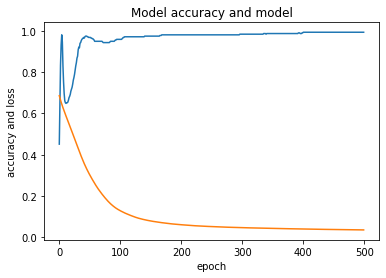

In [15]:
#visualize model and loss accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and model')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

In [16]:
type(X_test)

pandas.core.frame.DataFrame

In [17]:
print('shape of training data: ',X_train.shape)
print('shape of test data: ',X_test.shape)

shape of training data:  (319, 12)
shape of test data:  (80, 12)


In [18]:
pred=model.predict(X_test)
pred=[1 if y>=0.5 else 0 for y in pred]
pred

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

In [19]:
print('Original: {0}'.format(','.join(str(x) for x in Y_test)))
print('Predict: {0}'.format(','.join(str(x) for x in pred)))

Original: 0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1
Predict: 0,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1


In [20]:
pickle.dump(model, open('model.pkl','wb'))